# NICGSlowDown pdf和cdf图像绘制

论文中使用这样的图像来说明 adv样本的长度从峰值和分布来看都比初始样本长度要长

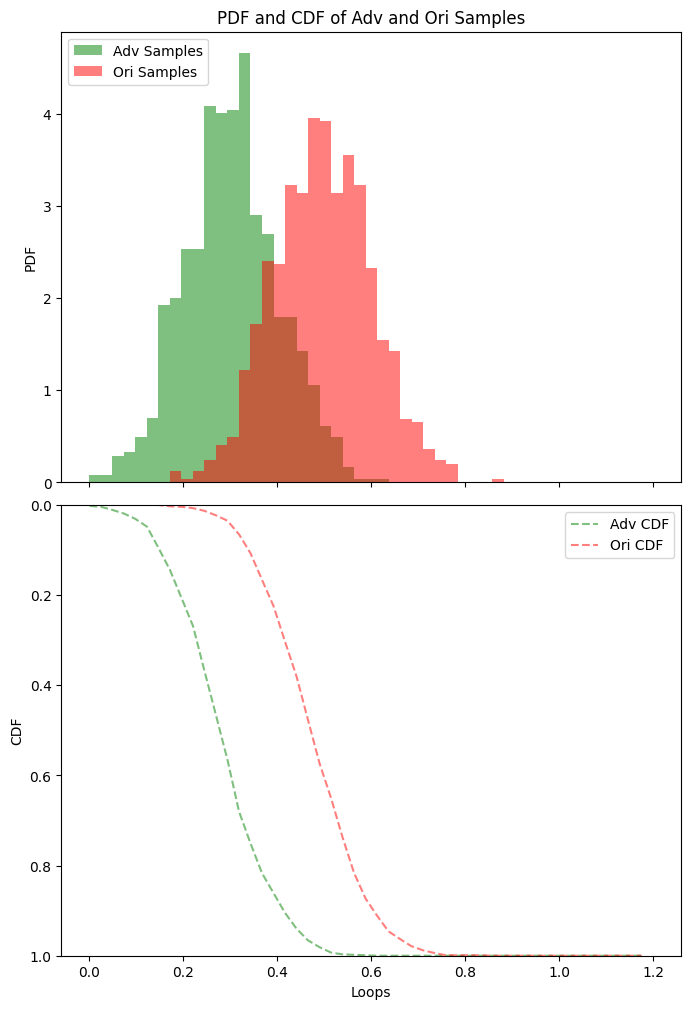

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 假设adv_samples和ori_samples已经定义
adv_samples = np.random.normal(0.3, 0.1, 1000)
ori_samples = np.random.normal(0.5, 0.1, 1000)

# 合并数据
all_samples = np.concatenate([adv_samples, ori_samples])

# 计算直方图
bins = np.linspace(0, 1.2, 50)
adv_hist, _ = np.histogram(adv_samples, bins=bins, density=True)
ori_hist, _ = np.histogram(ori_samples, bins=bins, density=True)

# 计算CDF
adv_cdf = np.cumsum(adv_hist) / np.sum(adv_hist)
ori_cdf = np.cumsum(ori_hist) / np.sum(ori_hist)

# 创建图和两个子图（上面是PDF，下面是CDF）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), sharex=True)  # sharex=True共享x轴

# 绘制PDF（上面的子图）
ax1.hist(adv_samples, bins=bins, density=True, color='green', alpha=0.5, label='Adv Samples')
ax1.hist(ori_samples, bins=bins, density=True, color='red', alpha=0.5, label='Ori Samples')
ax1.set_ylabel('PDF', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.set_title('PDF and CDF of Adv and Ori Samples')  # 设置总标题

# 绘制CDF（下面的子图）
ax2.plot(bins[:-1], adv_cdf, color='green', label='Adv CDF', alpha=0.5, linestyle='--')
ax2.plot(bins[:-1], ori_cdf, color='red', label='Ori CDF', alpha=0.5, linestyle='--')
ax2.set_xlabel('Loops')  # 只在下面的子图设置x轴标签
ax2.set_ylabel('CDF', color='black')
ax2.set_ylim(1, 0)  # 反转y轴，使CDF从1到0
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# 调整子图间距
plt.subplots_adjust(hspace=0.05)  # 减小子图之间的垂直间距

# 显示图像
plt.show()